In [25]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# AR model
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [26]:
df_train = pd.read_csv('./DailyDelhiClimateTrain.csv',index_col='date')
df_train.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [27]:
df_train.drop('2017-01-01',inplace = True)

In [28]:
df_test = pd.read_csv('./DailyDelhiClimateTest.csv',index_col='date')
df_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [29]:
df_train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2013-01-01 to 2016-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1461 non-null   float64
 1   humidity      1461 non-null   float64
 2   wind_speed    1461 non-null   float64
 3   meanpressure  1461 non-null   float64
dtypes: float64(4)
memory usage: 57.1+ KB


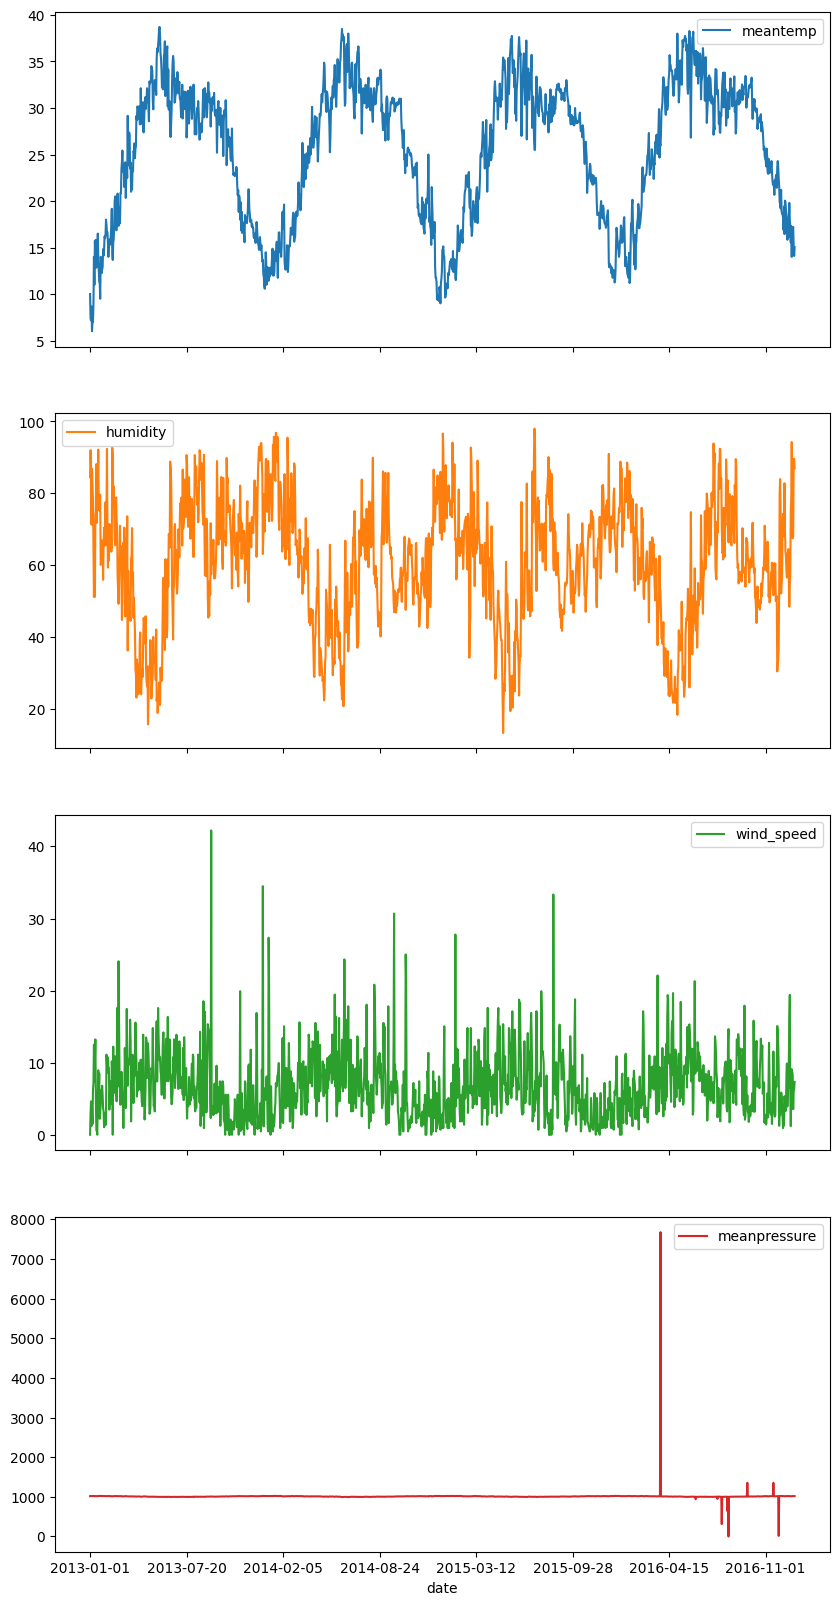

In [31]:
df_train.plot(subplots = True, figsize = (10,20))
plt.show()

In [32]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,25.506127,60.744851,6.806865,1011.101197
std,7.339416,16.743928,4.559688,180.293335
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.571429
50%,27.714286,62.625000,6.250000,1008.555556
75%,31.312500,72.125000,9.250000,1014.937500
max,38.714286,98.000000,42.220000,7679.333333


<AxesSubplot: >

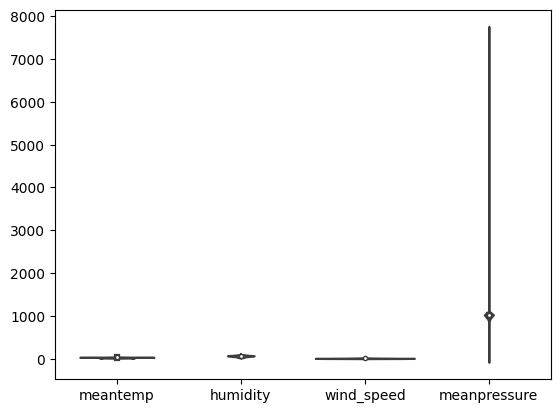

In [33]:
sns.violinplot(df_train)

function to remove outlyers using IQR 

In [34]:
# def remove_outliers(df, col_name):
#     """
#     Remove outliers from a single column of a pandas DataFrame using IQR method.
#     :param df: pandas DataFrame
#     :param col_name: name of the column to filter
#     :return: filtered DataFrame
#     """
#     # calculate the IQR of the column
#     Q1 = df[col_name].quantile(0.25)
#     Q3 = df[col_name].quantile(0.75)
#     IQR = Q3 - Q1

#     # define the lower and upper bounds for the column
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # create a boolean mask for the column that flags outliers
#     mask = (df[col_name] < lower_bound) | (df[col_name] > upper_bound)

#     # select the rows of the DataFrame without outliers
#     df_filtered = df[~mask]

#     return df_filtered

In [35]:
def remove_outliers(df, col_no):
    # calculate the IQR of the column
    Q1 = df.iloc[:,col_no].quantile(0.25)
    Q3 = df.iloc[:,col_no].quantile(0.75)
    IQR = Q3 - Q1

    # define the lower and upper bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # create a boolean mask for the column that flags outliers
    mask = (df.iloc[:,col_no] < lower_bound) | (df.iloc[:,col_no] > upper_bound)

    # select the rows of the DataFrame without outliers
    df_filtered = df[~mask]

    return df_filtered

In [36]:
for i in range(df_train.shape[1]):
    df_train = remove_outliers(df_train, i)
    
for i in range(df_train.shape[1]):
    df_test = remove_outliers(df_test, i)


<AxesSubplot: >

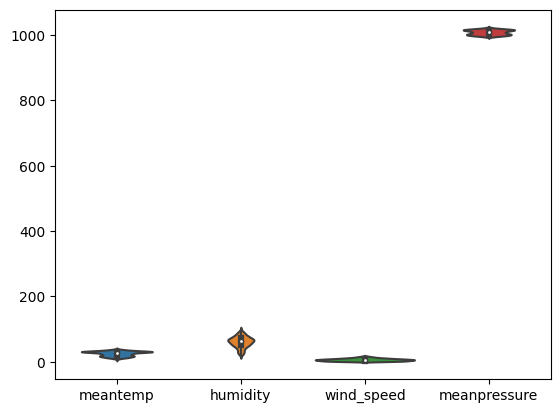

In [37]:
sns.violinplot(df_train)

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

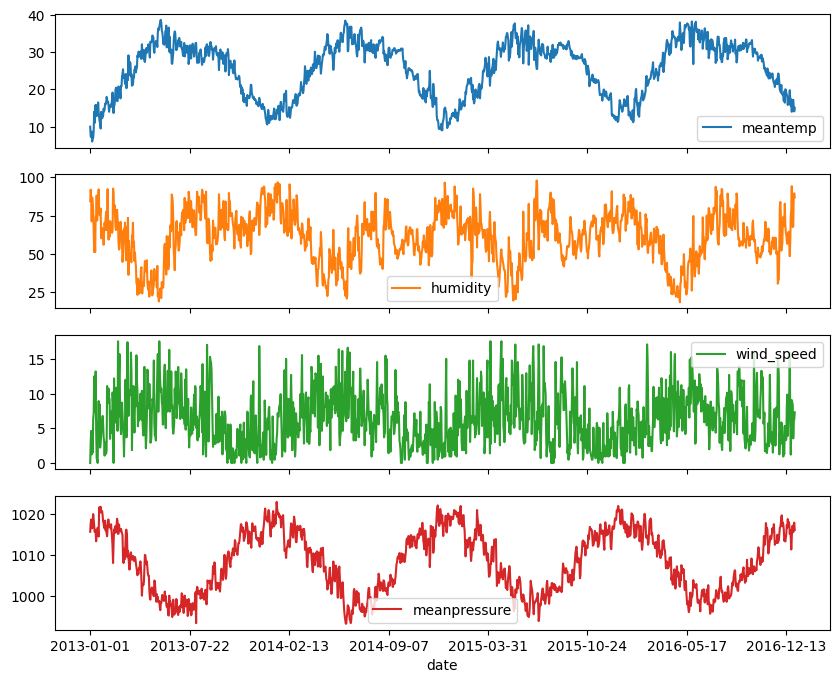

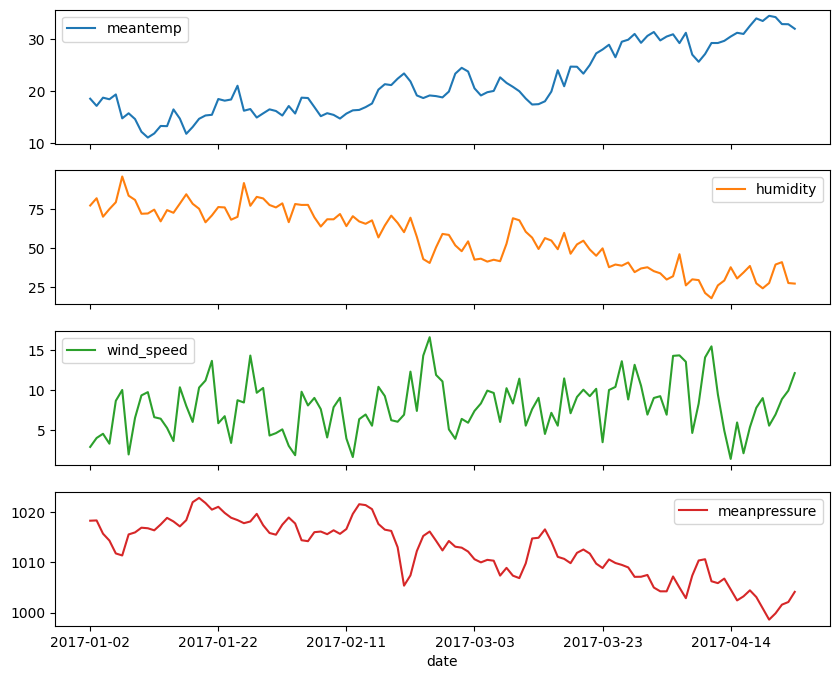

In [38]:
df_train.plot(subplots=True,figsize=(10,8))
df_test.plot(subplots=True,figsize=(10,8))

In [39]:
# for i in range(df_train.shape[1]):
#     plt.figure(figsize=(16,8))
#     plt.title('Complete valyes of the date' + df_train.columns[i])
#     plt.xlabel('Dates')
#     plt.ylabel(df_train.columns[i])
#     plt.plot(df_train.iloc[:,i], 'green', label='Train data')
#     plt.plot(df_test.iloc[:,i], 'blue', label='Test data')
#     plt.legend()
#     plt.show()

P-value:  0.09233489163714276


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


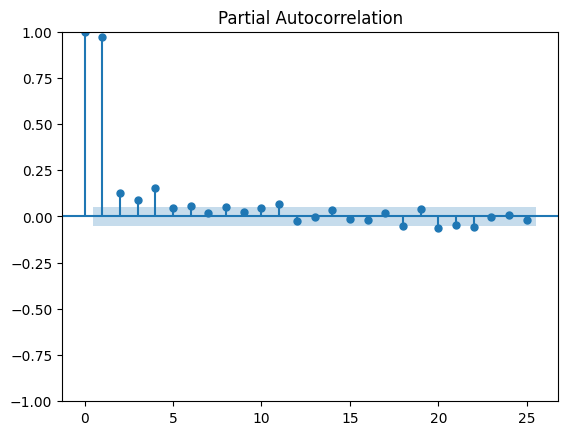

In [40]:
from statsmodels.tsa.stattools import adfuller

df_stationarityTest = adfuller(df_train['meantemp'], autolag='AIC')

print("P-value: ", df_stationarityTest[1])

from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df_train['meantemp'], lags=25)

AR Model

In [41]:
predection = list()
actual = list(df_test['meantemp'])
input = list(df_train['meantemp'])
for i in range(len(actual)):
    ar_model = AutoReg(input, lags=2).fit()
    # print(ar_model.summary())
    pred = ar_model.predict(start = len(input), end = len(input))
    predection.append(pred[0])
    input.append(actual[i])


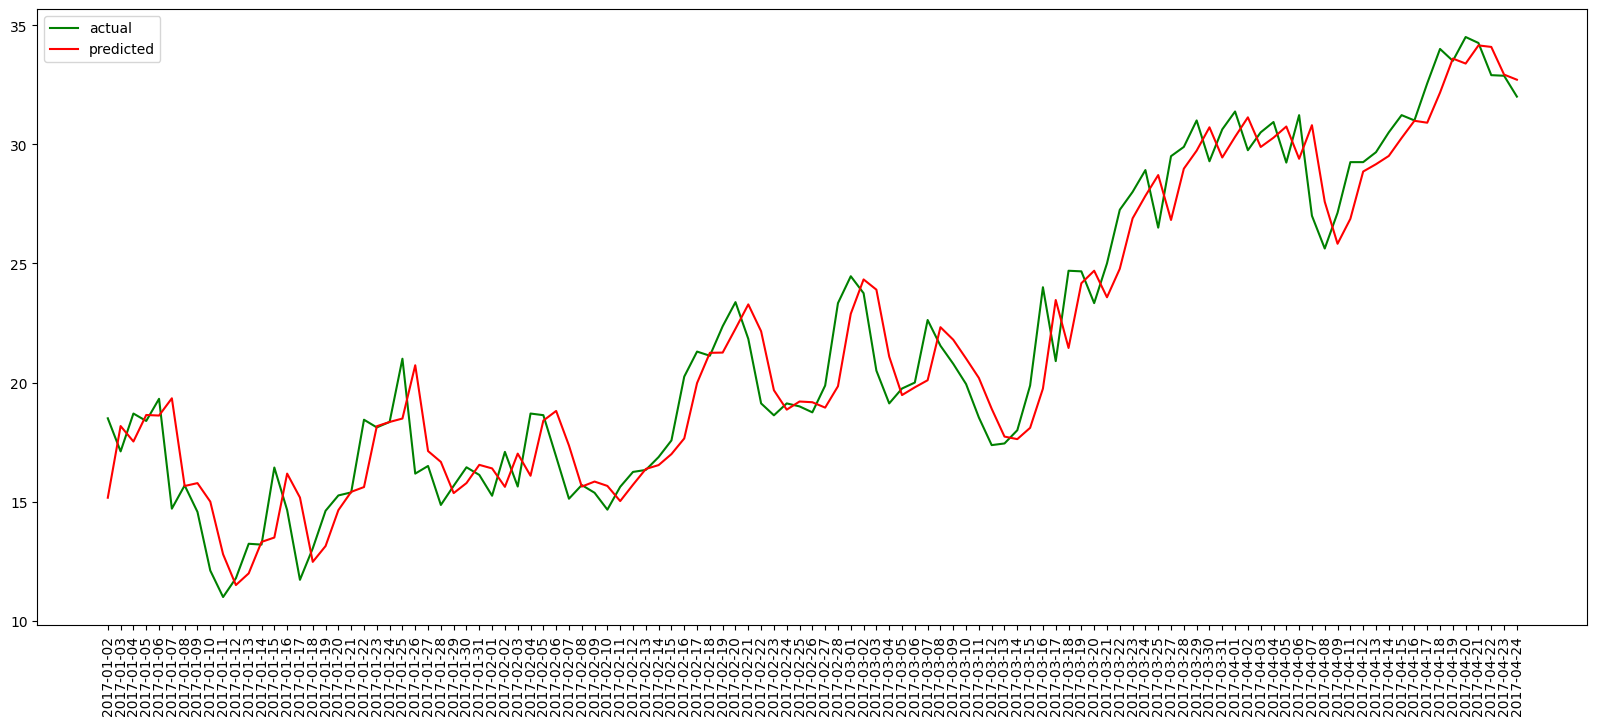

In [42]:
plt.figure(figsize=(20,8))
plt.plot(df_test.index,actual, color ='green')
plt.plot(df_test.index,predection, color = 'red')
plt.legend(['actual', 'predicted'])
plt.xticks(rotation='vertical')
plt.show()

MA model

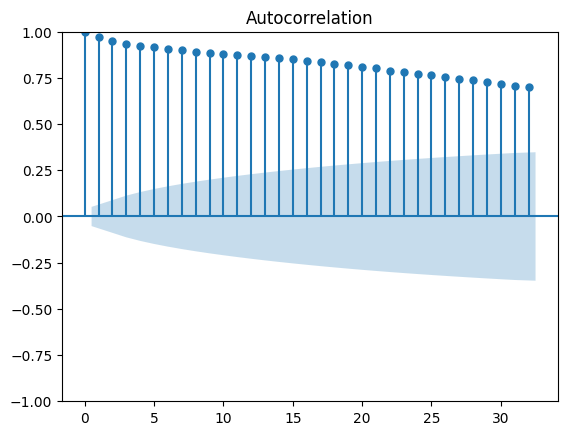

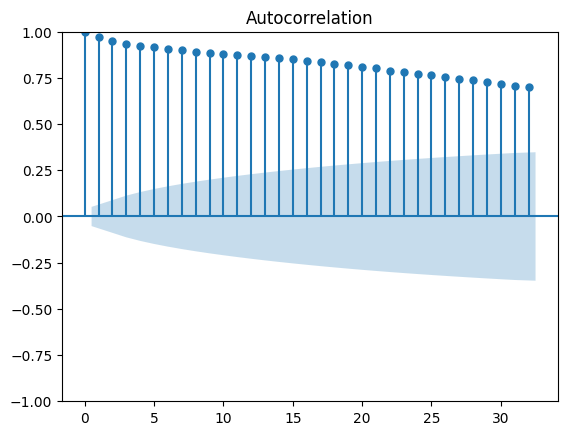

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
actual = list(df_test['meantemp'])
input = list(df_train['meantemp'])
predection.clear()
plot_acf(df_train['meantemp'])

In [44]:
for i in range(len(actual)):
    print(i)
    ma_model =sm.tsa.arima.ARIMA(input, order=(0, 0,5)).fit()
    # print(ar_model.summary())
    pred = ma_model.predict(start = len(input), end = len(input))
    predection.append(pred[0])
    input.append(actual[i])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


In [45]:
len(predection)

111

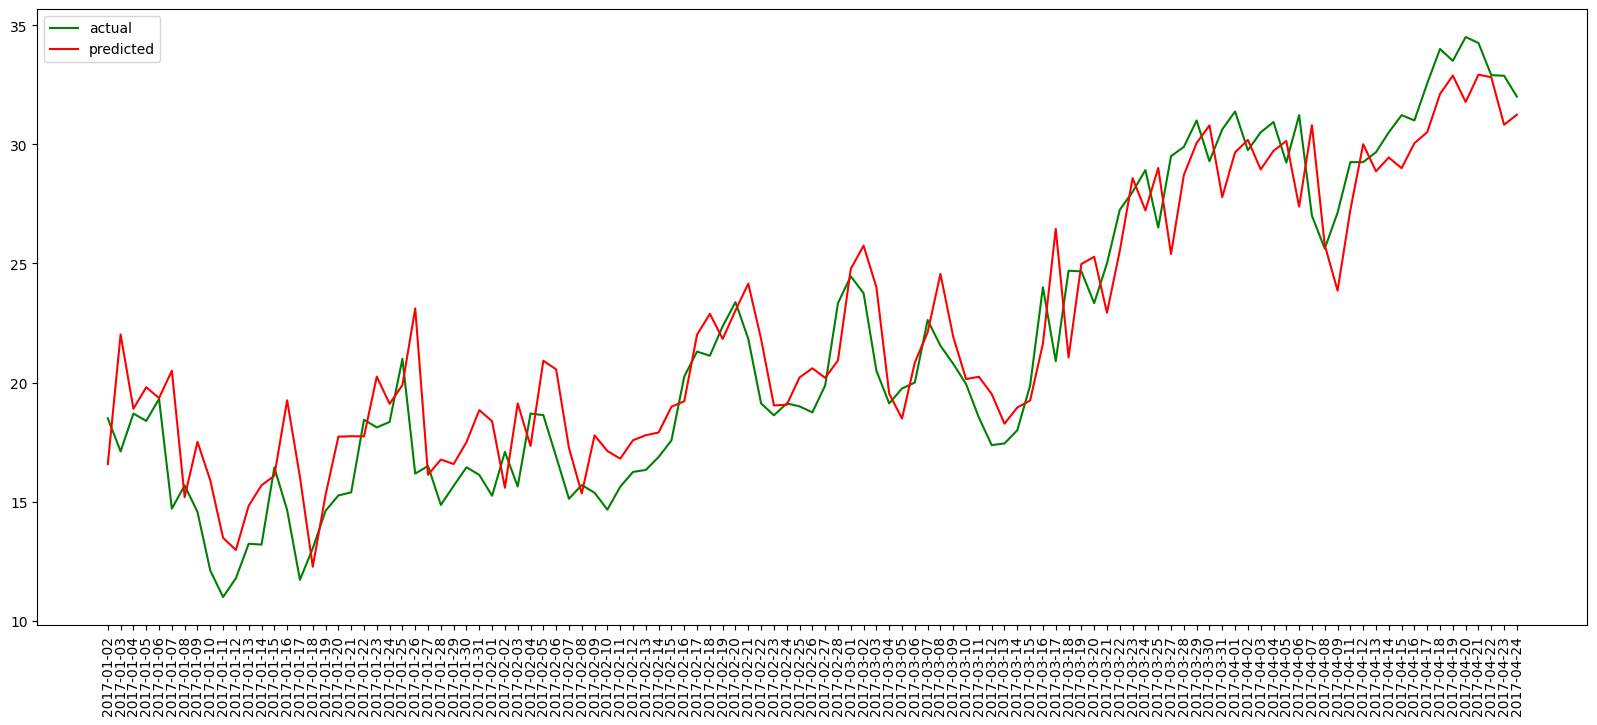

In [46]:
plt.figure(figsize=(20,8))
plt.plot(df_test.index,actual, color ='green')
plt.plot(df_test.index,predection, color = 'red')
plt.legend(['actual', 'predicted'])
plt.xticks(rotation='vertical')
plt.show()

ARMA model

In [47]:
actual = list(df_test['meantemp'])
input = list(df_train['meantemp'])
predection.clear()
for i in range(len(actual)):
    print(i)
    arma_model =sm.tsa.arima.ARIMA(input, order=(2, 0,5)).fit()
    pred = arma_model.predict(start = len(input), end = len(input))
    predection.append(pred[0])
    input.append(actual[i])
print(len(predection))

d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:6

111


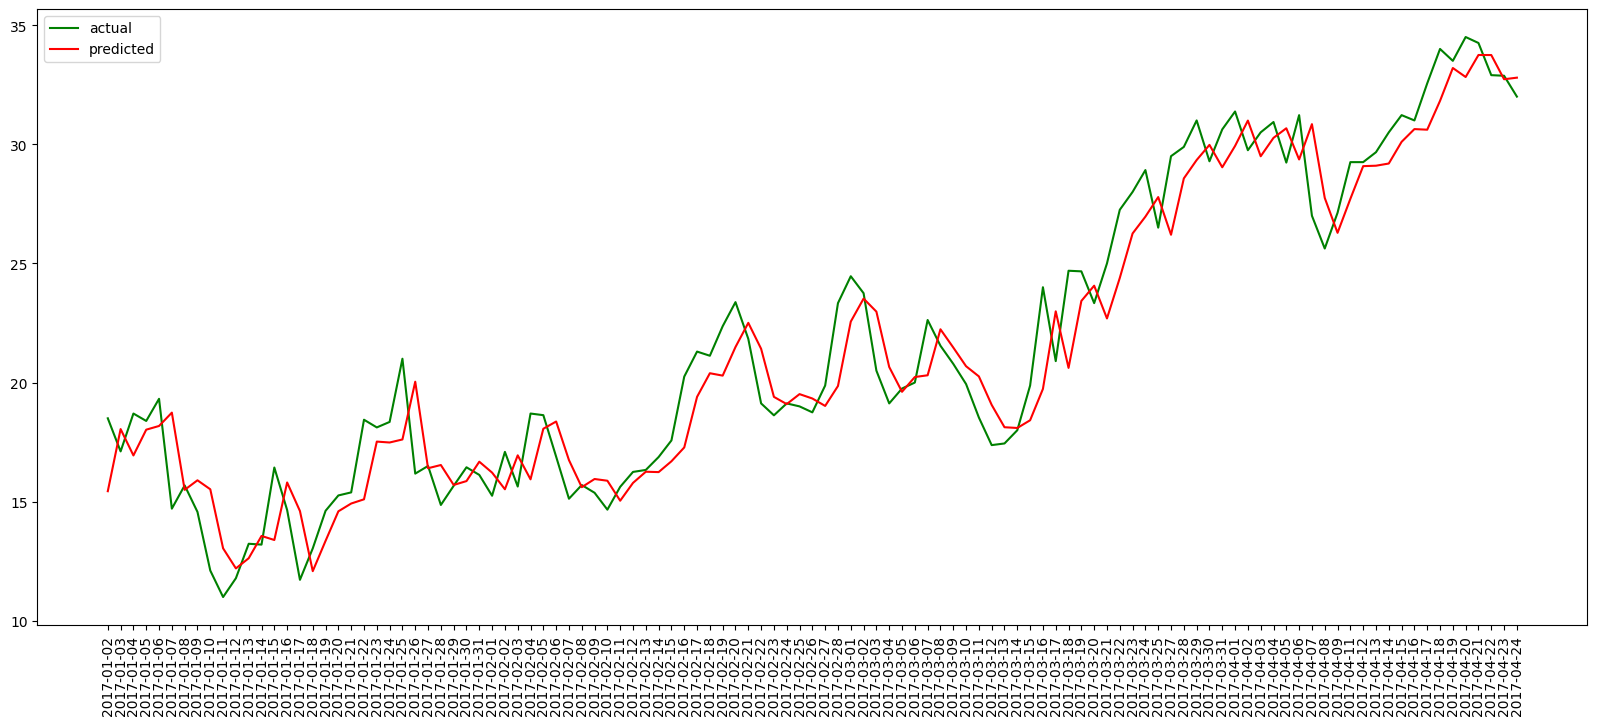

In [48]:
plt.figure(figsize=(20,8))
plt.plot(df_test.index,actual, color ='green')
plt.plot(df_test.index,predection, color = 'red')
plt.legend(['actual', 'predicted'])
plt.xticks(rotation='vertical')
plt.show()

ARIMA model

In [50]:
actual = list(df_test['meantemp'])
input = list(df_train['meantemp'])
predection.clear()
for i in range(len(actual)):
    print(i)
    arima_model =sm.tsa.arima.ARIMA(input, order=(2, 1,5)).fit()
    pred = arima_model.predict(start = len(input), end = len(input))
    predection.append(pred[0])
    input.append(actual[i])
print(len(predection))

0


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6
7


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


10
11


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


12


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


13


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


14


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


15


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


16


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


17


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


18


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


19


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


20
21


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


22


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


23


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


24


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


25


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


26


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


27


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


28


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


29


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


30


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


31


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


32


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


33


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


34


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


35


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


36


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


37


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


38


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


39


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


40


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


41


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


42


d:\softwares\Codes\PDS\PDSvenv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


43
